#  ATOC5860 Application Lab #3 - eigenfaces
##### Written by Dr. Vineel Yettella (ATOC Ph.D. 2018, now at Apple), with additional commenting from Prof. Kay (CU)
##### last updated February 22, 2023 - works with environment atoc5860env2023clean.yml

### LEARNING GOALS:
1) Complete an EOF analysis using Singular Value Decomposition (SVD). 
2) Provide a qualitative description of the results. What are the eigenvalues, the eigenvectors, and the principal components?  What do you learn from each one about the space-time structure of your underlying dataset?
3) Provide a qualitative description of the results: What are the eigenvalue,the eigenvector, and the principal component?  What do they mean physically? What do you learn from each one about the space-time structure of the underlying dataset?
4) Reconstruct original data using a subset of EOFs: How many EOFs are needed to reconstruct faces?

### DATA and UNDERLYING SCIENCE MOTIVATION:  
In this notebook, you apply EOF analysis to a standard database for facial recognition: the At&t database. 

*“Our Database of Faces, (formerly 'The ORL Database of Faces'), contains a set of face images taken between April 1992 and April 1994 at the lab. The database was used in the context of a face recognition project carried out in collaboration with the Speech, Vision and Robotics Group of the Cambridge University Engineering Department.

There are ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).”*

The goal is to think a bit “out of the box” of Atmospheric and Oceanic Sciences about potential applications for the methods you are learning in this class.  And also to think about some of the pitfalls of using statistics for facial recognition. Are the faces here representative of all faces?

### Non-exhaustive Questions to guide your analysis:  
1) Execute all code without making any modifications. What do the EOFs (spatial patterns) tell you?  What do the PCs tell you?  How do you interpret what you are finding?
    - The EOFs are the structures that explain the most variance in the dataset. In this example dataset, it looks like the forehead, hair and eyes explain the most variance (from the first 2 EOFs).
    - PCs: The PCs indicate how much the structure explains each sample. Here the sampling dimension is image number. 
    - Output structure: each column of the 'eofs' variable is an EOF, which must be reshaped back to the original values in order to generate the eigenfaces. The rows are the sampling dimensions. 

2) Reconstruct a face.  How many EOFs do you need to reconstruct a face from the database?  Does it depend on the face that it used?
    - We need about 20 EOFs to reconstruct a face to the point where it is recognizable, but it varies depending on the face used. We can perfectly reproduce the faces if we use all of the EOFs. 

3) Food for thought: The database contains 75% white men.  How do you think this database sampling limitation impacts the utility of the database for subjects who are not white men?  What are some parallels that you might draw when analyzing atmospheric and oceanic sciences datasets?  Hint: Think about the limitations of extrapolation beyond the domain where you have data.
    - In atmospheric and oceanic sciences, our observations are heavily biased based on location.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load faces. Adapted from the AT&T face database
att_faces = np.load('att_faces.npy')
height, width, n_faces = att_faces.shape
print((height, width, n_faces))

(112, 92, 400)


In [34]:
att_faces

array([[ 48.,  60.,  39., ...,  62.,  97., 108.],
       [ 49.,  60.,  44., ...,  64., 105., 108.],
       [ 45.,  62.,  53., ...,  64., 107., 106.],
       ...,
       [ 56.,  40.,  47., ...,  80., 106., 103.],
       [ 56.,  53.,  48., ...,  77., 105., 106.],
       [ 54.,  46.,  47., ...,  79., 108., 105.]])

In [115]:
# dimensions: att_faces[y, x, image index]
# plt.imshow(att_faces[:, :50, 61], cmap = 'gray')

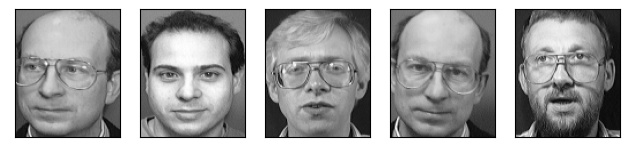

In [32]:
#print a few faces from the database - Look at your data!!
n = 5
fig, axs = plt.subplots(1, n)

random_face_inds = np.random.choice(np.arange(n_faces), n, replace=False)
for i, ax in enumerate(axs):
    ax.imshow(att_faces[:, :, random_face_inds[i]], cmap = 'gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

fig.tight_layout()

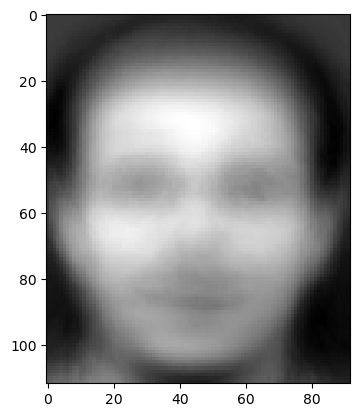

In [84]:
#print the average face
average_face = np.mean(att_faces, axis = 2);
plt.imshow(average_face, cmap = 'gray');

In [148]:
#Each row represents one image, and each column is a pixel value from that image
#x and y coordinates have been combined into one 1-D array
#Construct the data matrix. Samples (different faces) along rows and 
#variables (individual pixels) along columns
print(att_faces.shape)
data_matrix = np.reshape(att_faces, (height*width, n_faces)).T
print(data_matrix.shape)

#Construct anomaly matrix by removing the average face, i.e., 
#by removing the column means from each column of the data_matrix
anomaly_matrix = data_matrix - np.mean(data_matrix, axis=0)
#anomaly_matrix = anomaly_matrix/np.std(anomaly_matrix, axis=0)
[eofs, s, v] = np.linalg.svd(anomaly_matrix.T, full_matrices=False)
print(eofs.shape)

eigenvals = np.square(s)
variance_explained = eigenvals/np.sum(eigenvals)

(112, 92, 400)
(400, 10304)
(10304, 400)


In [149]:
anomaly_matrix.T.shape

(10304, 400)

In [150]:
eofs.shape

(10304, 400)

In [151]:
## Explanation of functions: See Barnes Chapter 3, page 14

## eofs
# This is the same as u 
# This is the spatial structure
# The columns of u are the eigenvectors
print(eofs.shape)

## s 
# square root of the eigenvalues
# s contains the square root of each eigen value that corresponds to a matching eigenvector
print(s.shape)

## v
# The columns of V are the corresponding principle components (eigenvectors)
print(v.shape)

(10304, 400)
(400,)
(400, 400)


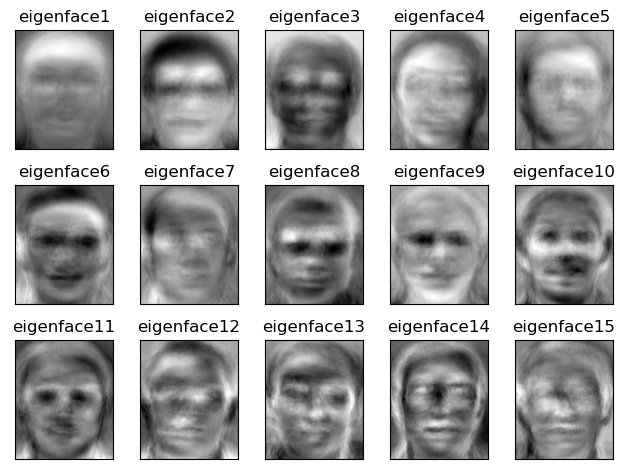

In [152]:
#Plot the top 15 eofs (a.k.a eigenfaces)

fig, axs = plt.subplots(3, 5)

for i, ax in enumerate(np.reshape(axs, 15)):
    eigenface = np.reshape(eofs[:, i], [height, width])
    ax.imshow(eigenface, cmap='gray')
    ax.set_title('eigenface' + str(i+1))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

fig.tight_layout()

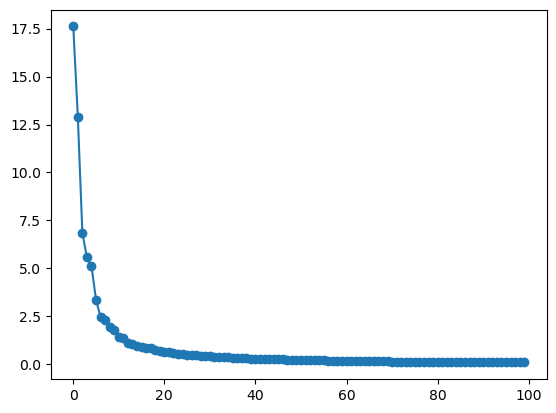

In [7]:
#Plot variance explained by each eigenface
plt.plot(variance_explained[0:100]*100, marker='o')

(400, 400)
(20,)
(112, 92)


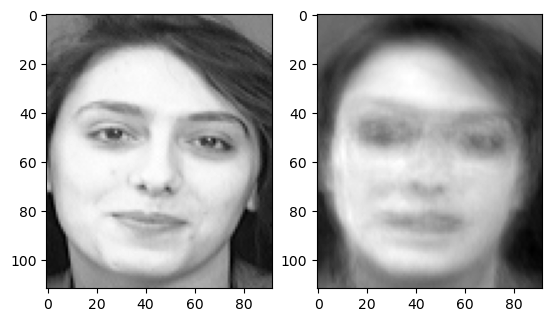

In [163]:
#project the faces onto the eigenfaces
weights = np.dot(anomaly_matrix, eofs)
print(weights.shape)

#choose a face to reconstruct
face_num = 75 #0 to 389
original_face = att_faces[:, :, face_num]

#choose number of weights to reconstruct face
weights_num = 20
# weights_num = 400
face_weights = weights[face_num, 0:weights_num]
print(face_weights.shape)
reconstructed_face = np.dot(eofs[:, 0:weights_num], face_weights)

#At this point, the reconstructed face is an anomaly face with the average face removed. 
#Add back the average face to get the original face

reconstructed_face = np.reshape(reconstructed_face, (height, width)) + average_face
print(reconstructed_face.shape)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(original_face, cmap='gray');
axs[1].imshow(reconstructed_face, cmap='gray');

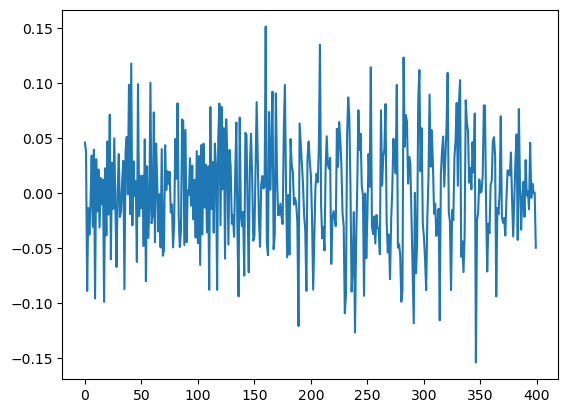

In [138]:
# Plot the principle components
# Select the principle component for EOF1
z1 = v[:,0]
plt.plot(range(0,400), z1)

In [89]:
# f, ax = plt.subplots(40, 1, figsize=(5,75))
# for i,j in enumerate(range(0,400,10)):
#     ax[i].imshow(att_faces[:, :, j], cmap='binary_r')
#     ax[i].set_title('Face idx#: ' + str(j))
#     ax[i].axis('off')